## Extra Trees - Extremely Randomized Trees

> Setting Random Forest ablaze with more randomness

**Extra Trees (Extremely Randomized Trees)** is an ensemble machine learning model that combines multiple decision trees, similar to Random Forest but with additional randomization. While both use multiple trees, Extra Trees generates splits totally randomly, without searching for optimal thresholds. Instead of bootstrap sampling, it typically uses the whole dataset for each tree but maintains randomization by selecting random split points.

Just like Random Forest, for classification tasks, the forest predicts by majority voting among trees, while for regression tasks, it averages the predictions.

The model's strength comes from its extreme randomization approach. This additional randomization makes Extra Trees generally faster to train while maintaining comparable performance to Random Forests.

> *Extra Trees* offers an interesting trade-off compared to Random Forests. By introducing more randomization in the splitting process and using the full dataset for each tree, it achieves comparable accuracy while training much faster. This makes it particularly attractive for large-scale applications where computational efficiency is crucial.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Create and prepare dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                   72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                   88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Rearrange columns
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]

# Prepare features and target
X,y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

#### Main Mechanism

Here’s how Extra Trees works:

1. **Full Dataset Usage:** Unlike Random Forest, each tree uses the complete training dataset rather than a bootstrap sample.

2. **Random Feature Selection:** When making a split, each tree only considers a random subset of features (typically square root of total features), similar to Random Forest.

3. **Random Split Selection:** The key difference is in splitting — instead of searching for the optimal threshold, Extra Trees randomly generates several split points for each feature and picks the best among these random splits. This makes it much faster than Random Forest.

4. **Growing Trees:** Each tree grows using these extremely randomized splits until it reaches a stopping point (like pure groups or minimum sample size).

5. **Final Prediction:** All trees vote together for the final prediction. For classification, take the majority vote of class predictions; for regression, average the predicted values from all trees.

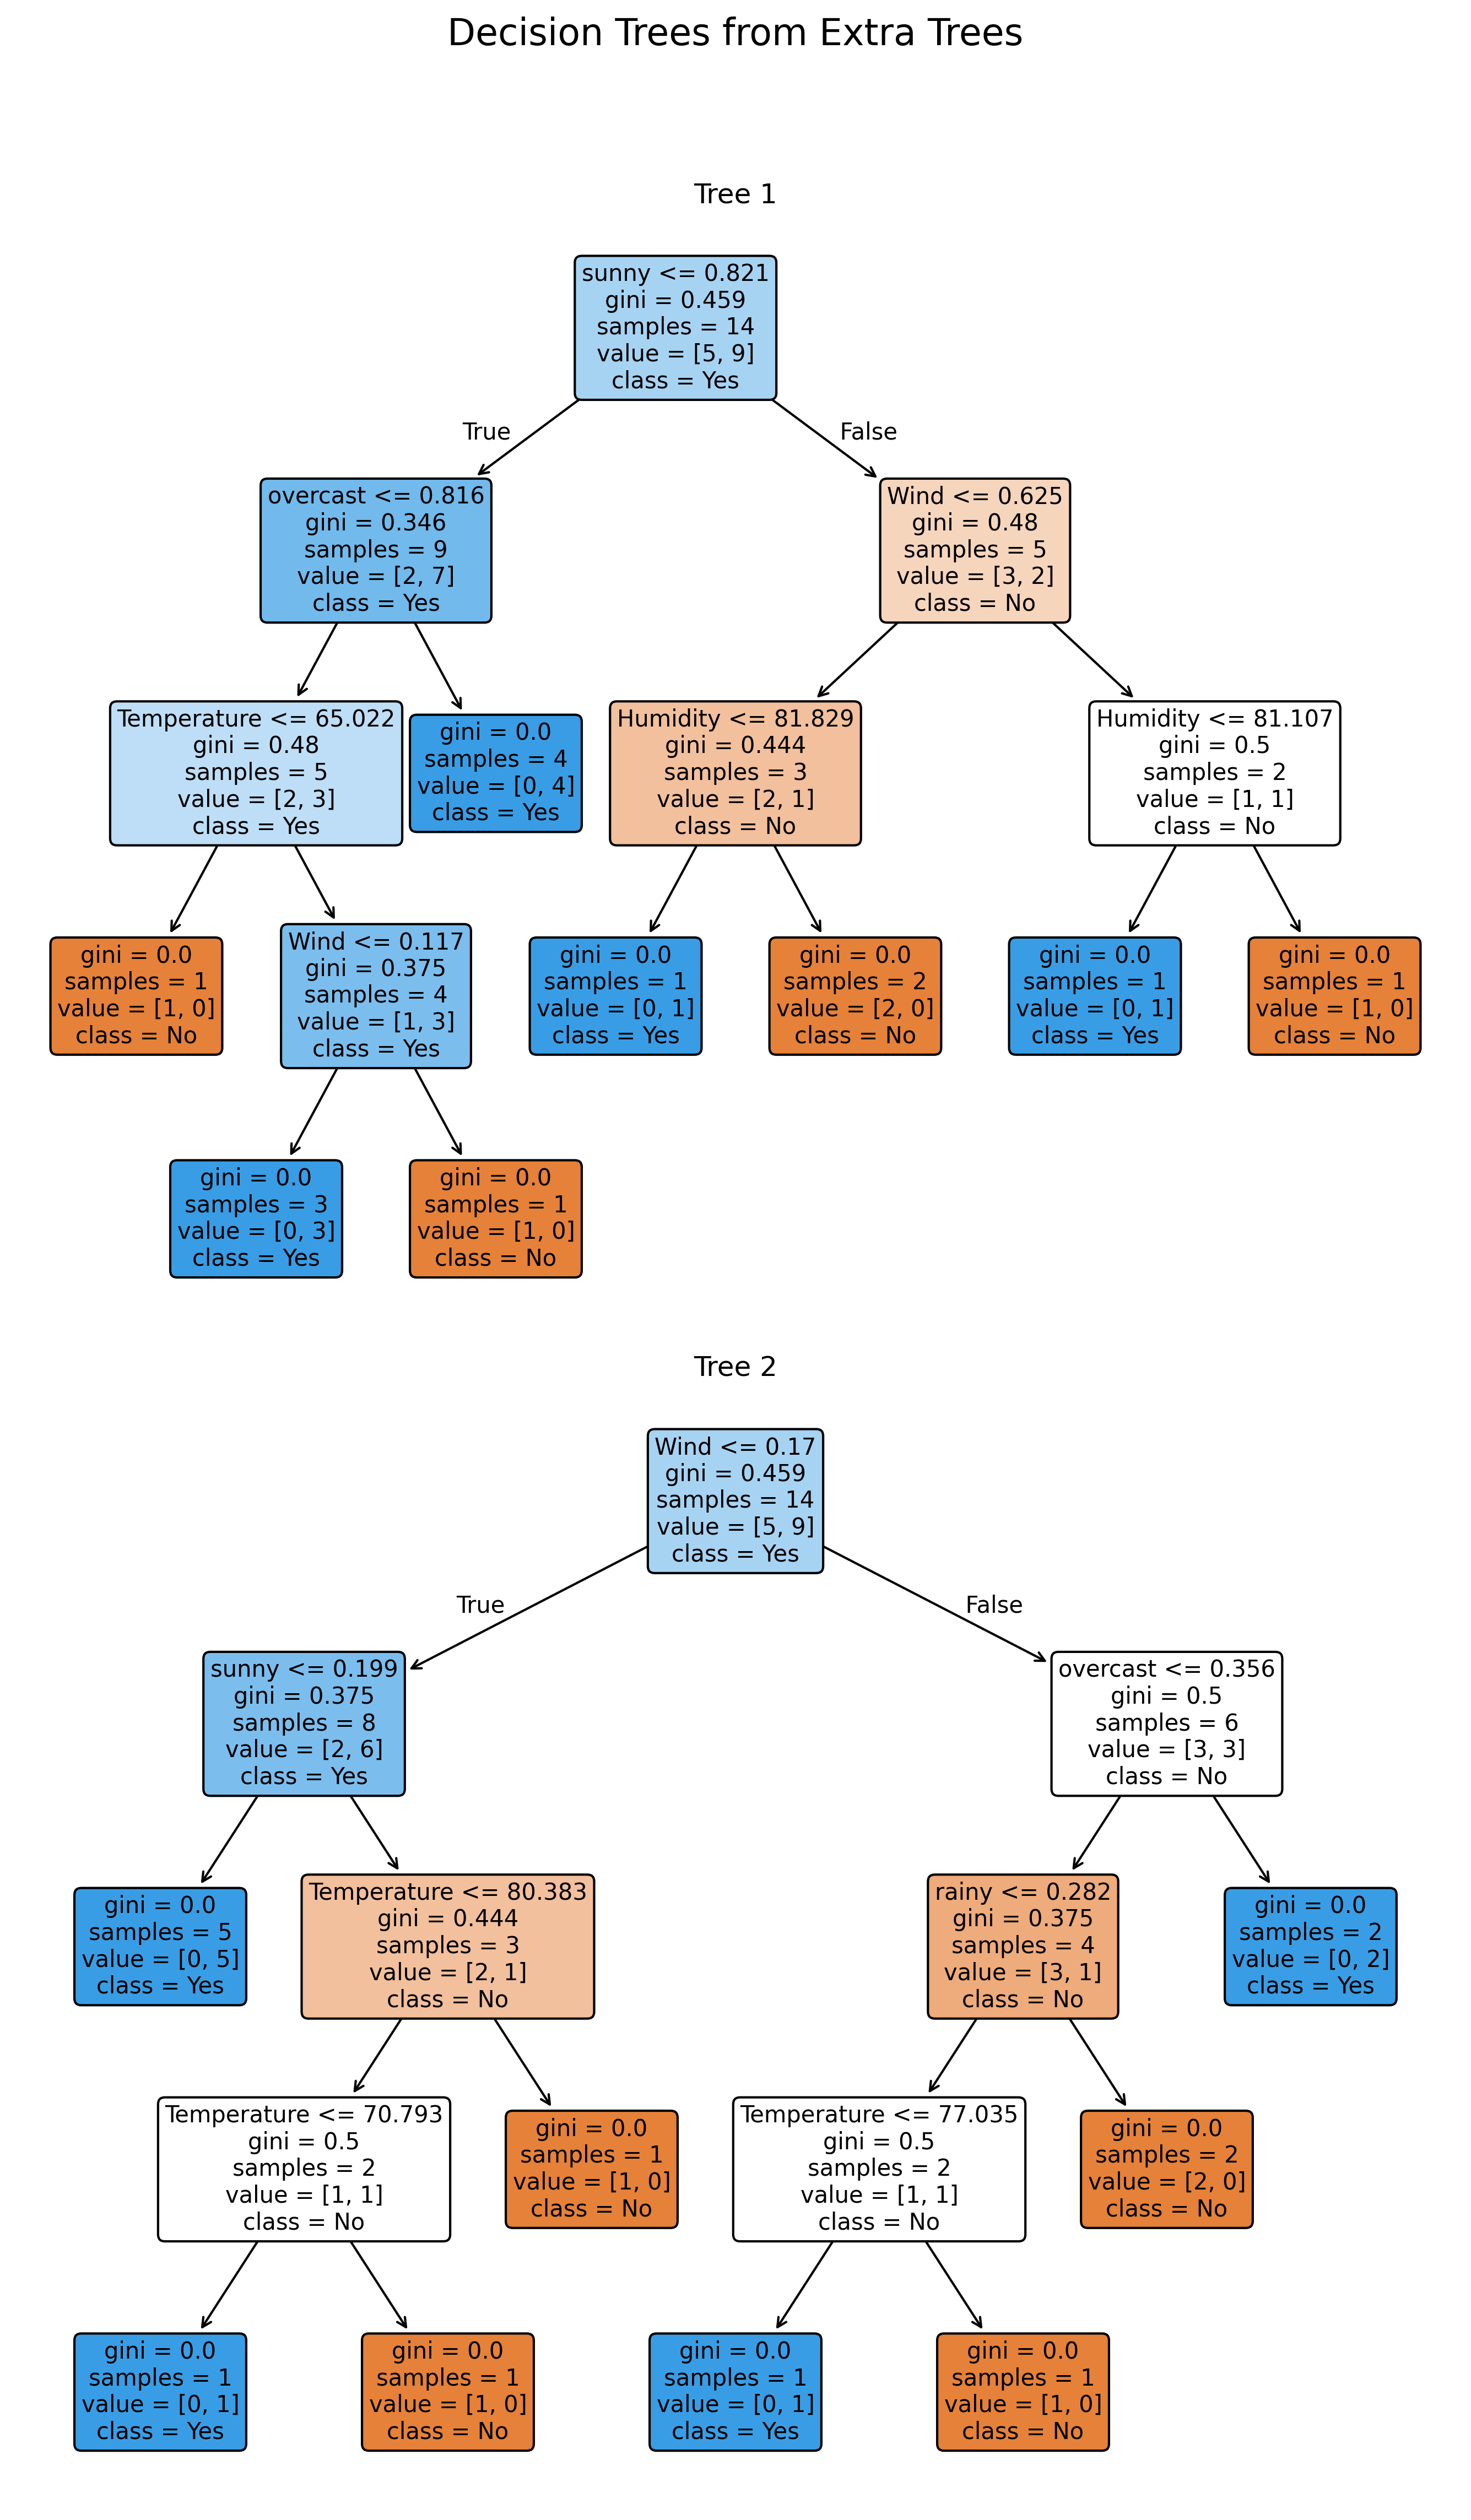

In [2]:
from sklearn.tree import plot_tree
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Train Extra Trees
np.random.seed(42)  # For reproducibility
rf = ExtraTreesClassifier(n_estimators=100, random_state=5)
rf.fit(X_train, y_train)

# Create visualizations for trees 1 and 2
trees_to_show = [0, 1]  # Python uses 0-based indexing
feature_names = X_train.columns.tolist()
class_names = ['No', 'Yes']

# Set up the plot
fig, axes = plt.subplots(2, 1, figsize=(9, 16), dpi=300)  # Reduced height, increased DPI
fig.suptitle('Decision Trees from Extra Trees', fontsize=16)

# Plot each tree
for idx, tree_idx in enumerate(trees_to_show):
    plot_tree(rf.estimators_[tree_idx],
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              ax=axes[idx],
              fontsize=10) 
    axes[idx].set_title(f'Tree {tree_idx + 1}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [3]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf.predict(X_test)
})

# Print comparison
print("Prediction Comparison:")
print(comparison_df)

# Calculate and print accuracy
accuracy = rf.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.2%}")

Prediction Comparison:
    Actual  Predicted
14       0          0
15       1          1
16       1          1
17       0          1
18       0          0
19       0          0
20       1          1
21       1          1
22       1          1
23       1          1
24       1          1
25       1          1
26       0          1
27       1          1

Model Accuracy: 85.71%


#### Key Parameters

The key Extra Trees parameters (especially in `scikit-learn`) include all Decision Tree parameters, plus some unique ones.

> **Extra Trees-specific parameters**

**_n_estimators_** This parameter controls how many trees to build (default is 100).

**_bootstrap_** Unlike Random Forest, this is typically set to False by default in Extra Trees since it uses the full dataset. Setting it to True would make it more similar to Random Forest but might reduce the benefit of extreme randomization.

**_n_jobs_** This controls how many processor cores to use during training. Setting it to -1 uses all available cores, making training faster but using more memory. With big datasets, you might need to use fewer cores to avoid running out of memory.

> **Shared parameters with Decision Trees**

The following parameters works the same way as in Decision Tree.

**_max_depth_**: Maximum tree depth

**_min_samples_split_**: Minimum samples needed to split a node

**_min_samples_leaf_**: Minimum samples required at leaf node

#### Pros & Cons

###### *Pros*

**_Fast Training_**: Extra Trees trains significantly faster than Random Forests because it doesn't search for optimal splits but generates them randomly. This makes it particularly attractive for large datasets where computational efficiency matters.

**_Strong and Reliable_**: Like Random Forests, Extra Trees gives accurate results and is less likely to overfit than single decision trees. The extreme randomization in splitting, combined with ensemble voting, creates a robust model that works well across many problems.

**_Feature Importance_**: The model can tell you which features matter most in making predictions by measuring how much each feature helps across all trees. This helps you understand what drives your predictions.

**_Minimal Preprocessing_**: Extra Trees handles both numerical and categorical variables well without much preparation. They work well with missing values and outliers, and can find complex relationships in your data automatically.

##### *Cons*

**_Slightly Higher Bias_**: Due to its extremely randomized splitting strategy, Extra Trees might sometimes miss the optimal splits that Random Forest would find. This can lead to slightly higher bias, though it's usually compensated by lower variance.

**_Limited Interpretability_**: While you can see which features are important overall, it's harder to understand exactly why the model made a specific prediction, unlike with single decision trees. This can be a problem when you need to explain each decision.

**_Prediction Speed_**: Like Random Forests, to make a prediction, data must go through all trees and then combine their answers. This makes Extra Trees slower than simpler models, which might be an issue for real-time applications.